<a href="https://colab.research.google.com/github/HardikPrabhu/Quick-tutorials-for-pytorch/blob/main/First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating first Neural Net using pytorch



A simple linear transformation :

 A linear transformation is given by  $y = Ax$. Let $x \in R^{10}$ and $y \in R^5$. Then the shape of the matrix A should be (5,10)

In [2]:
# y = Ax
import torch
A = torch.rand(5,10)
x = torch.rand(10)
y = A@x
print(x.shape,y.shape)

torch.Size([10]) torch.Size([5])


Neural networks requires compution done in batches (Loss function supports batch wise, matrix multiplication supports batchwise will be able to use GPUs).

Therfore, the same transformation could be written as

$Y = XA^T$

where X is of shape (n,10), A of shape (5,10) and Y of shape(n,5). n is the number of samples. $X = [x_1,x_2, ...x_n]^T $







In [3]:
n = 10
x = x.view(1,-1)
X = torch.concat([x]*n, axis = 0)  # batch of copies of same instance
Y = X@A.T
print(Y) # per row (same calculations are happening)

tensor([[2.8343, 1.9582, 2.6418, 2.3198, 2.8973],
        [2.8343, 1.9582, 2.6418, 2.3198, 2.8973],
        [2.8343, 1.9582, 2.6418, 2.3198, 2.8973],
        [2.8343, 1.9582, 2.6418, 2.3198, 2.8973],
        [2.8343, 1.9582, 2.6418, 2.3198, 2.8973],
        [2.8343, 1.9582, 2.6418, 2.3198, 2.8973],
        [2.8343, 1.9582, 2.6418, 2.3198, 2.8973],
        [2.8343, 1.9582, 2.6418, 2.3198, 2.8973],
        [2.8343, 1.9582, 2.6418, 2.3198, 2.8973],
        [2.8343, 1.9582, 2.6418, 2.3198, 2.8973]])


In [4]:
# Now, lets try y = Ax + b  (let broadcasting takes care of it)
b = torch.tensor([1,2,3,4,5])
Y= X@A.T + b  # Shapes x:[n,10] A:[5,10]  -> X@T: [n,5] and b:[5] which by brodcasting becomes [5,5] same b each row:  essentially each row is (Ax_i+b).T [which is the lienar transformation we need]
print(Y)

tensor([[3.8343, 3.9582, 5.6418, 6.3198, 7.8973],
        [3.8343, 3.9582, 5.6418, 6.3198, 7.8973],
        [3.8343, 3.9582, 5.6418, 6.3198, 7.8973],
        [3.8343, 3.9582, 5.6418, 6.3198, 7.8973],
        [3.8343, 3.9582, 5.6418, 6.3198, 7.8973],
        [3.8343, 3.9582, 5.6418, 6.3198, 7.8973],
        [3.8343, 3.9582, 5.6418, 6.3198, 7.8973],
        [3.8343, 3.9582, 5.6418, 6.3198, 7.8973],
        [3.8343, 3.9582, 5.6418, 6.3198, 7.8973],
        [3.8343, 3.9582, 5.6418, 6.3198, 7.8973]])


In [5]:
# A neural network Layer Transform :   Have a horizontal view (data points are row vectors)
# Example of a soft-max operation

in_dim = 10
X = torch.rand(4,in_dim)  # 4 rows 10 features
out_dim = 5
W = torch.rand(in_dim,out_dim)
b = torch.rand(out_dim)
Z = X@W + b # broadcasting does the trick:  shape(4,5) + shape(5) ->  shape(4,5) + shape(1,5) -> shape(4,5) + shape(5,5) # creates copy of b per row and then
Z = torch.exp(Z) # element wise exp  (4,5)
print(Z.shape)
s = Z.sum(axis=1).view(-1,1) # Reshaping is important otherwise in certain cases, broadcasting may result in undesired results
print(s.shape)
softmax_out = Z/s   # shape(4,5)/shape(4,1) -> shape(4,5)/shape(4,5) copying along 1 dim.
print(softmax_out)
print("all rows sum upto 1 (as it should be)")
softmax_out.sum(axis=1)


torch.Size([4, 5])
torch.Size([4, 1])
tensor([[0.1486, 0.2613, 0.1466, 0.2550, 0.1885],
        [0.1196, 0.3810, 0.0901, 0.1674, 0.2419],
        [0.1689, 0.2593, 0.0993, 0.0798, 0.3927],
        [0.1686, 0.4000, 0.0877, 0.1168, 0.2268]])
all rows sum upto 1 (as it should be)


tensor([1.0000, 1.0000, 1.0000, 1.0000])

# Basic models using pytorch

In [6]:
import torch
import torch.nn as nn


1. Linear/logistic regression

In [7]:
# First use randn to genetate some data
X = torch.normal(0, 3, size=(100, 4))
W = torch.tensor([1.0,2,4,1])
b = torch.ones(100)
Y =  X @ W  + b
print(Y.shape)


torch.Size([100])


In [8]:
T = torch.normal(0,1,(4,))
c = torch.tensor(0.0)
params = [T,c]
for p in params:
    p.requires_grad=True

learning_rate = 1e-3

# The learning critera us already available (although we can create our custom one as well, will see it later)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params,lr = learning_rate)

In [9]:

for steps in range(10000):
  Y_pred = X@T + c
  loss = criterion(Y,Y_pred)
  optimizer.zero_grad() # optimiser accumlates grads it useful when your network is not starightforward
  loss.backward() # we have computed the required gradients
  optimizer.step() # according to algorithm such as SDG (where W = W - learning_rate*grad is used to update the weights)
print(loss.item())

9.629305131042543e-10


In [10]:
T,c

(tensor([1.0000, 2.0000, 4.0000, 1.0000], requires_grad=True),
 tensor(1.0000, requires_grad=True))

In [11]:
# more modular apporach Use wherever possible
criterion = nn.MSELoss()
class Linear_Regression(nn.Module):
   def __init__(self, in_feat):
    super().__init__() # call
    # define layers
    self.out = nn.Linear(in_feat,1) # this is going to be the name
   def forward(self,x,y=None):
      x = self.out(x)
      if y is None:
        return x
      y = y.view(-1,1)
      return criterion(x,y) # retun the loss or return the value, depends on the use



In [12]:
model = Linear_Regression(4)
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

for steps in range(10000):
  optimizer.zero_grad()
  loss = model(X,Y)
  loss.backward()
  optimizer.step()  # Y_pred = 100
print(loss.item())



9.629305131042543e-10


In [13]:
for name,i in model.named_parameters():
  print(name, i)

out.weight Parameter containing:
tensor([[1.0000, 2.0000, 4.0000, 1.0000]], requires_grad=True)
out.bias Parameter containing:
tensor([1.0000], requires_grad=True)


In [14]:
# same problem logistic regression
Y[Y>0] = 1
Y[Y<=0] = 0

In [15]:
criterion = nn.BCELoss()

class Logistic_Regression(nn.Module):
   def __init__(self, in_feat):
    super().__init__()
    # as a rule of thumb, i prefer writing a(i) here and h(i) = non_linear(a(i)) in forward definition
    self.out = nn.Linear(in_feat,1)
   def forward(self,x,y=None):
      x = self.out(x)
      x = torch.sigmoid(x)

      if y is None:
        return x
      y = y.view(-1,1)
      return criterion(x,y)


In [16]:
model = Logistic_Regression(4)
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)



In [17]:
for steps in range(10000):
  optimizer.zero_grad()
  loss = model(X,Y)
  loss.backward()
  optimizer.step()  # Y_pred = 100
print(loss.item())


for name,i in model.named_parameters():
  print(name, i)

0.013113501481711864
out.weight Parameter containing:
tensor([[1.3248, 3.3477, 5.9720, 1.2209]], requires_grad=True)
out.bias Parameter containing:
tensor([1.2914], requires_grad=True)


# Notes on gradient decsent

In [18]:
a = torch.tensor([1.0,2,3],requires_grad=True)
y = torch.dot(a,a)
print(y)
# y is part of the computational graph
y.backward()
a.grad

tensor(14., grad_fn=<DotBackward0>)


tensor([2., 4., 6.])

In [20]:
# cant call it again
y.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [22]:
# grad descent
a = torch.tensor([0.3,0.2,3],requires_grad=True)

def f(a):
  return torch.matmul(a,a)

for i in range(100):
  f(a).backward() # calculate gradient
  with torch.no_grad():
      a -=  0.1*a.grad  # (some leaf variable error o.w)
  print(a)
  a.grad.zero_() # resets the gradient



tensor([0.2400, 0.1600, 2.4000], requires_grad=True)
tensor([0.1920, 0.1280, 1.9200], requires_grad=True)
tensor([0.1536, 0.1024, 1.5360], requires_grad=True)
tensor([0.1229, 0.0819, 1.2288], requires_grad=True)
tensor([0.0983, 0.0655, 0.9830], requires_grad=True)
tensor([0.0786, 0.0524, 0.7864], requires_grad=True)
tensor([0.0629, 0.0419, 0.6291], requires_grad=True)
tensor([0.0503, 0.0336, 0.5033], requires_grad=True)
tensor([0.0403, 0.0268, 0.4027], requires_grad=True)
tensor([0.0322, 0.0215, 0.3221], requires_grad=True)
tensor([0.0258, 0.0172, 0.2577], requires_grad=True)
tensor([0.0206, 0.0137, 0.2062], requires_grad=True)
tensor([0.0165, 0.0110, 0.1649], requires_grad=True)
tensor([0.0132, 0.0088, 0.1319], requires_grad=True)
tensor([0.0106, 0.0070, 0.1056], requires_grad=True)
tensor([0.0084, 0.0056, 0.0844], requires_grad=True)
tensor([0.0068, 0.0045, 0.0676], requires_grad=True)
tensor([0.0054, 0.0036, 0.0540], requires_grad=True)
tensor([0.0043, 0.0029, 0.0432], requires_grad

Using optimizer instead

In [23]:
from torch.optim import SGD
# grad descent
a = torch.tensor([0.3,0.2,3],requires_grad=True)

def f(a):
  return torch.matmul(a,a)

optimizer = SGD([a],0.1)
for i in range(100):
  f(a).backward() # calculate gradient
  """with torch.no_grad():
      a -=  0.1*a.grad
  """
  optimizer.step()
  optimizer.zero_grad() # resets the gradients of tensors involved
  print(a)



tensor([0.2400, 0.1600, 2.4000], requires_grad=True)
tensor([0.1920, 0.1280, 1.9200], requires_grad=True)
tensor([0.1536, 0.1024, 1.5360], requires_grad=True)
tensor([0.1229, 0.0819, 1.2288], requires_grad=True)
tensor([0.0983, 0.0655, 0.9830], requires_grad=True)
tensor([0.0786, 0.0524, 0.7864], requires_grad=True)
tensor([0.0629, 0.0419, 0.6291], requires_grad=True)
tensor([0.0503, 0.0336, 0.5033], requires_grad=True)
tensor([0.0403, 0.0268, 0.4027], requires_grad=True)
tensor([0.0322, 0.0215, 0.3221], requires_grad=True)
tensor([0.0258, 0.0172, 0.2577], requires_grad=True)
tensor([0.0206, 0.0137, 0.2062], requires_grad=True)
tensor([0.0165, 0.0110, 0.1649], requires_grad=True)
tensor([0.0132, 0.0088, 0.1319], requires_grad=True)
tensor([0.0106, 0.0070, 0.1056], requires_grad=True)
tensor([0.0084, 0.0056, 0.0844], requires_grad=True)
tensor([0.0068, 0.0045, 0.0676], requires_grad=True)
tensor([0.0054, 0.0036, 0.0540], requires_grad=True)
tensor([0.0043, 0.0029, 0.0432], requires_grad

In [24]:
# use autograd instead if you want the gradient of intermidiate node (not the leaf node)
x = torch.tensor([2,2.0],requires_grad=True)
y = 3*x
z = torch.dot(y,y)
torch.autograd.grad(z, y)

(tensor([12., 12.]),)

In [25]:
# Another example
x = torch.tensor([2,2.0],requires_grad=True)
y = 3*x
u = y + x
z = torch.dot(u,y)
torch.autograd.grad(z, y)


(tensor([14., 14.]),)

Note: Weights for atleast the simple architectures are leaf nodes so may not have to worry that much

Basic neural networks in pytorch ...

In [30]:
# Dataset
import numpy as np
X = np.random.normal(0,2,1000)
Y = X**2  + 2

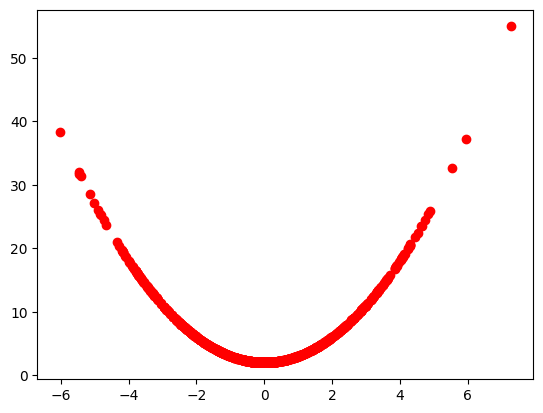

In [31]:
import matplotlib.pyplot as plt
plt.plot(X,Y,"ro")

In [32]:
import torch.nn as nn
import torch.nn.functional as F

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        # Define blocks of computation here
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32,1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

model = MyNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss = nn.MSELoss()
num_epochs = 500



In [33]:
X_train = torch.tensor(X,dtype=torch.float).view(-1,1)
Y_train = torch.tensor(Y,dtype=torch.float).view(-1,1)

In [34]:
for epoch in range(num_epochs):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)

        # Compute the loss
        l = loss(outputs, Y_train)

        # Backward pass
        l.backward()

        # Update the parameters
        optimizer.step()
        print(f"epoch: {epoch}", l)

epoch: 0 tensor(71.9247, grad_fn=<MseLossBackward0>)
epoch: 1 tensor(9.1064, grad_fn=<MseLossBackward0>)
epoch: 2 tensor(19.8191, grad_fn=<MseLossBackward0>)
epoch: 3 tensor(7.5111, grad_fn=<MseLossBackward0>)
epoch: 4 tensor(8.9137, grad_fn=<MseLossBackward0>)
epoch: 5 tensor(12.7799, grad_fn=<MseLossBackward0>)
epoch: 6 tensor(5.1139, grad_fn=<MseLossBackward0>)
epoch: 7 tensor(3.2152, grad_fn=<MseLossBackward0>)
epoch: 8 tensor(6.8209, grad_fn=<MseLossBackward0>)
epoch: 9 tensor(5.6674, grad_fn=<MseLossBackward0>)
epoch: 10 tensor(1.8952, grad_fn=<MseLossBackward0>)
epoch: 11 tensor(2.1440, grad_fn=<MseLossBackward0>)
epoch: 12 tensor(3.6282, grad_fn=<MseLossBackward0>)
epoch: 13 tensor(3.4370, grad_fn=<MseLossBackward0>)
epoch: 14 tensor(2.1295, grad_fn=<MseLossBackward0>)
epoch: 15 tensor(1.1711, grad_fn=<MseLossBackward0>)
epoch: 16 tensor(2.6905, grad_fn=<MseLossBackward0>)
epoch: 17 tensor(2.1408, grad_fn=<MseLossBackward0>)
epoch: 18 tensor(1.1382, grad_fn=<MseLossBackward0>)


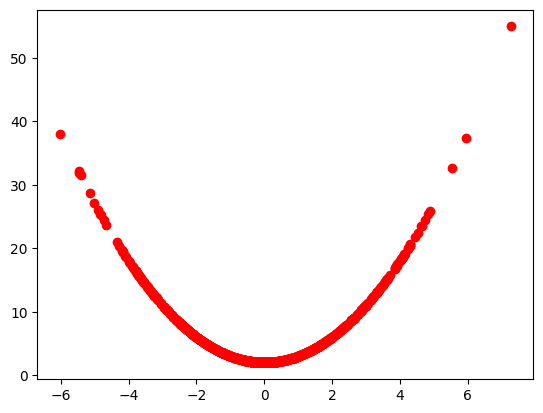

In [35]:
pred = model(X_train).detach().numpy()
plt.plot(X,pred,"ro")

In [36]:
# can I do gradient descent on the model itself, i.e update input based on model output?

x = torch.tensor([-10.0],requires_grad = True)

optimizer = torch.optim.Adam([x], lr=0.1)

for i in range(1000):
  out = model(x)
  out.backward()
  optimizer.step()
  optimizer.zero_grad()

print(x,model(x))  # close enough

tensor([-0.0265], requires_grad=True) tensor([2.0056], grad_fn=<ViewBackward0>)


# Rnns: The pytorch way

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
import pandas as pd
data = pd.read_csv("airline-passengers.csv")

--2024-03-05 19:42:49--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2024-03-05 19:42:50 (19.6 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



((100,), (44,))

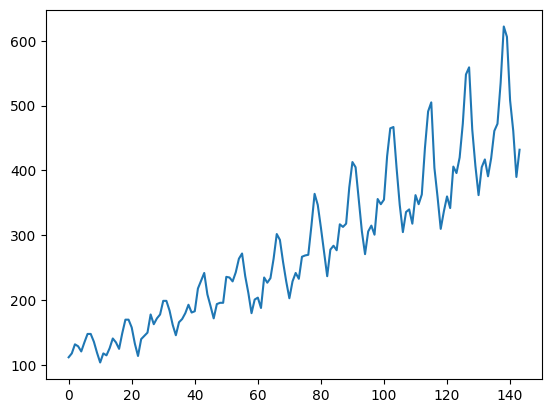

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data["Passengers"])
split = int(len(data)*0.7)
timeseries = data["Passengers"]
train,test = data["Passengers"][:split], data["Passengers"][split:]
train.shape,test.shape

In [ ]:
def create_seq(data,stepsize=5,type="train",m=0,s=1):
  X,y = [],[]

  if type=="train":
    m = data.mean()
    s = data.std()

  data = (data - m)/s

  data = list(data)
  for i in range(len(data)-stepsize): # [0,1,2,3,4]
    feature = data[i:i+stepsize]
    target = data[i+stepsize]
    X.append(feature)
    y.append(target)
  return torch.tensor(X).float().view(-1,5,1), torch.tensor(y).float().view(-1,1),m,s

In [ ]:
X_train,Y_train,m,s = create_seq(train)
X_test,Y_test,m_,s_ = create_seq(test,m=m,s=s,type="test")

In [ ]:
X_train = X_train
Y_train = Y_train
X_train.shape, X_test.shape

(torch.Size([95, 5, 1]), torch.Size([39, 5, 1]))

In [ ]:
class Airmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.lstm = nn.LSTM(input_size =1,hidden_size = 50,num_layers = 1,batch_first=True)
    self.linear = nn.Linear(50,1)
  def forward(self,x):
    x,_ = self.lstm(x)
    x = x[:,-1,:] # only the last
    x = self.linear(x)
    return x

In [ ]:
import numpy as np
import torch.utils.data as data
model = Airmodel()
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, Y_train), shuffle=True, batch_size=32)



In [ ]:
n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, Y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, Y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 0.0256, test RMSE 0.9445
Epoch 100: train RMSE 0.0211, test RMSE 0.9505
Epoch 200: train RMSE 0.0133, test RMSE 0.9478
Epoch 300: train RMSE 0.0105, test RMSE 0.9502
Epoch 400: train RMSE 0.0183, test RMSE 0.9496
Epoch 500: train RMSE 0.0106, test RMSE 0.9481
Epoch 600: train RMSE 0.0370, test RMSE 0.9610
Epoch 700: train RMSE 0.0019, test RMSE 0.9445
Epoch 800: train RMSE 0.0153, test RMSE 0.9402
Epoch 900: train RMSE 0.0142, test RMSE 0.9456
Epoch 1000: train RMSE 0.0109, test RMSE 0.9466
Epoch 1100: train RMSE 0.0045, test RMSE 0.9445
Epoch 1200: train RMSE 0.0089, test RMSE 0.9444
Epoch 1300: train RMSE 0.0115, test RMSE 0.9379
Epoch 1400: train RMSE 0.0082, test RMSE 0.9373
Epoch 1500: train RMSE 0.0017, test RMSE 0.9386
Epoch 1600: train RMSE 0.0012, test RMSE 0.9386
Epoch 1700: train RMSE 0.0173, test RMSE 0.9320
Epoch 1800: train RMSE 0.0024, test RMSE 0.9430
Epoch 1900: train RMSE 0.0007, test RMSE 0.9426


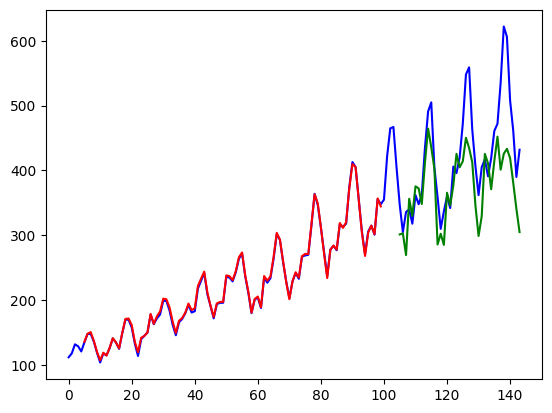

In [ ]:
train_size = len(train)
lookback = 5
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)

    train_plot[lookback:train_size] = model(X_train).view(-1)*s +m
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test).view(-1)*s +m
# plot
plt.plot(timeseries, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()